In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Načtení dat ze souboru CSV v podadresáři 'data'
#data = pd.read_csv('data/world_bank_indicators.csv')
data = pd.read_csv('data/train_data.csv')
# Shrnutí dat a seznam názvů sloupců
print("Souhrn dat:")
print(data.describe())
print("\nSeznam názvů sloupců:")
print(list(data.columns))



Souhrn dat:
               year  Access to electricity (% of population)  \
count  13568.000000                              6105.000000   
mean    1991.533019                                80.950615   
std       18.546592                                28.506558   
min     1960.000000                                 1.027836   
25%     1975.000000                                69.253830   
50%     1992.000000                                98.254728   
75%     2008.000000                               100.000000   
max     2023.000000                               100.000000   

       Adjusted net savings, including particulate emission damage (% of GNI)  \
count                                        4372.000000                        
mean                                            7.716867                        
std                                            11.590645                        
min                                          -166.127193                        
25%   

In [11]:
from definitions import FuzzyRelations
from definitions import models
from definitions import models as md
from definitions import quantifiers
import openpyxl

from importlib import reload  # Python 3.4+
FuzzyRelations = reload(FuzzyRelations)
models = reload(models)
quantifiers = reload(quantifiers)
X = data['GDP per capita (current US$)']
Y = data['Fertility rate, total (births per woman)']

# Remove NaN rows
mask = pd.notnull(X) & pd.notnull(Y)
X = X[mask]
Y = Y[mask]

# read data
datax=X
datavalx=Y
# Remove NaN rows
mask = pd.notnull(datax) & pd.notnull(datavalx)
datax = datax[mask]
datavalx = datavalx[mask]

# set declination of fuzzy sets
decl=5
# set numbers (-1) of fuzzy sets on X,Y, respectively
nrules=5
# generate model from data for internaly set discretization 100 and create plots
ModelQuantifiedRules=md.QRules_model(datax,datavalx,nrules,decl)


## Plot and Save the Model

In [12]:
models = reload(models)

md.plot_and_save_QModel(ModelQuantifiedRules, filename_base="model5Rules_training_WorldBank")

{'plot_file': 'model5Rules_training_WorldBank_plot.png',
 'pickle_file': 'model5Rules_training_WorldBank_model.pkl'}

## Load and Plot the Model

In [8]:
import os

print(os.getcwd())
print(os.listdir())  # nebo os.listdir(os.getcwd())


d:\Documents\Python\Implikative_models_with_quantifiers
['.git', 'data', 'definitions', 'images', 'model_training_WorldBank_model.pkl', 'model_training_WorldBank_plot.png', 'my_model.pkl', 'my_model_plot.png', 'ParametersSavingUploading_QuantifiersBasedModels.ipynb', 'Precision_of_QuantifiersBasedModels.ipynb', 'QuantifiersBasedModels.ipynb', 'Quantifiers_Based_Implicative_Models.ipynb', 'Quantifiers_Examples.ipynb', 'README.md', 'Various_Cartesian_Products.ipynb', 'WorldBankExample.ipynb', 'WorldBankExample10Rules.ipynb']


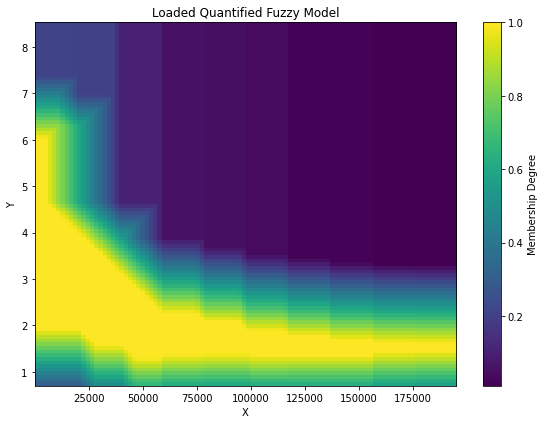

In [ ]:
loaded_model = md.load_and_plot_QModel("model5Rules_training_WorldBank_model.pkl")
